In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.optimize

from datetime import datetime
import pytz

import gm2
import trfp

import allantools as allan

Welcome to JupyROOT 6.12/04


In [ ]:
# %%time
# ## took 4 min 16 sec at last run
# ## using cumtrapz method, only take 42 sec

# run = trfp.Run(3956)
# run2 = trfp.Run(3960)

# file_name = "new_interp_runs_3956_3960.h5"

# run.save_h5(file_name)
# run2.save_h5(file_name)

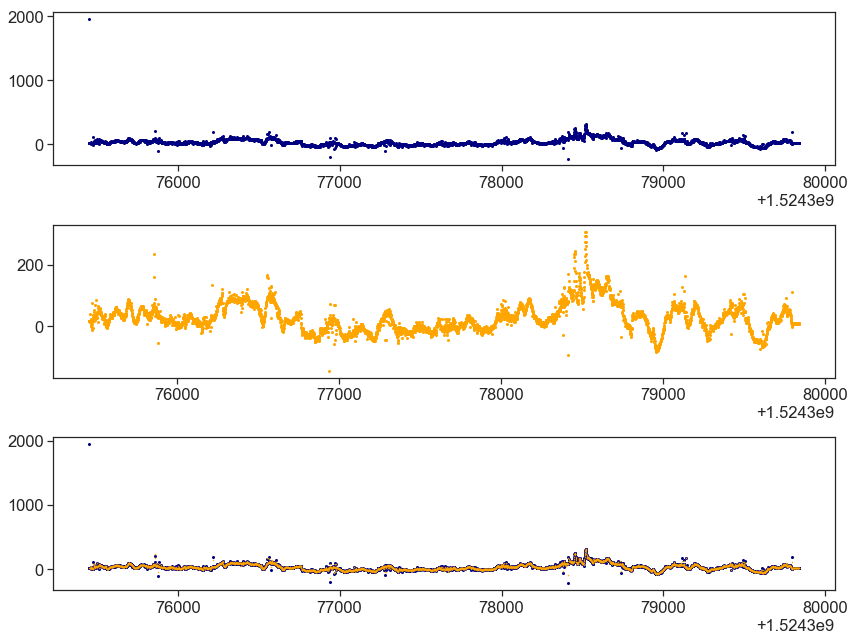

In [19]:
# this cell looks at the difference between the old interpolation method
# and new interpolation method for a fixed probe run

col = 'tr,m17'


new_fp_moment_df = pd.read_hdf('new_interp_runs_3956_3960.h5', key='run_3956_moment_df')
fp_moment_df = pd.read_hdf('../run_hdf5/60hr/60hr_trolley_runs_1.h5', key='run_3956_moment_df')

fig, axs = plt.subplots(3,1)
plt.sca(axs[0])
plt.plot(fp_moment_df.index.values, fp_moment_df[col], '.', color='navy', markersize=4)
plt.sca(axs[1])
plt.plot(new_fp_moment_df.index.values, new_fp_moment_df[col], '.', color='orange', markersize=4)
plt.sca(axs[2])
plt.plot(fp_moment_df.index.values, fp_moment_df[col], '.', color='navy', markersize=4)
plt.plot(new_fp_moment_df.index.values, new_fp_moment_df[col], '.', color='orange', markersize=1)
# plt.plot(new_fp_moment_df.index.values, new_fp_moment_df[col]-fp_moment_df[col])

fig.set_size_inches(12,9)
fig.tight_layout()


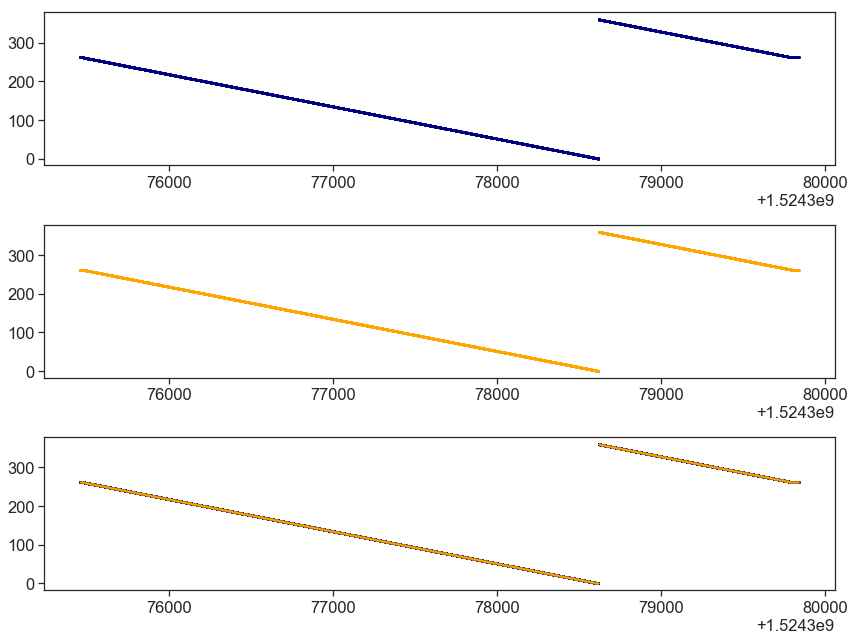

In [10]:
# this cell looks at the difference between the old interpolation method
# and new interpolation method for a trolley run

col = 'tr_phi'

tr_moment_df = pd.read_hdf('../run_hdf5/60hr/60hr_trolley_runs_1.h5', key='run_3956_moment_df')
tr_moment_df = tr_moment_df.iloc[4:]
new_moment_df = pd.read_hdf('new_interp_runs_3956_3960.h5', key='run_3956_moment_df')

fig, axs = plt.subplots(3,1)
plt.sca(axs[0])
plt.plot(tr_moment_df.index.values, tr_moment_df[col], '.', color='navy', markersize=4)
plt.sca(axs[1])
plt.plot(new_moment_df.index.values, new_moment_df[col], '.', color='orange', markersize=4)
plt.sca(axs[2])
plt.plot(tr_moment_df.index.values, tr_moment_df[col], '.', color='navy', markersize=4)
plt.plot(new_moment_df.index.values, new_moment_df[col], '.', color='orange', markersize=1)
# plt.plot(new_moment_df.index.values, new_moment_df.index.values-tr_moment_df.index.values)

fig.set_size_inches(12,9)
fig.tight_layout()


In [23]:
run3 = gm2.Trolley([3955])
tr_time, tr_phi, tr_freq = run3.getBasics()

Reading event 1800/1804 99.78%  
loop done: 100%                                    


0


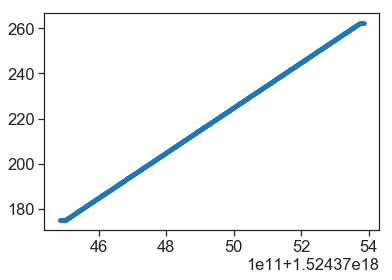

In [28]:
plt.plot(tr_time[1:,0], tr_phi[1:,0], '.')

index = np.arange(tr_phi[1:,0].size)[np.abs(tr_phi[1:,0]-tr_phi[0:-1,0]) > 300]
print index.size

In [ ]:
# run 4138 has interpolation error in phi (new x out of bounds)